In [1]:
#|default_exp app

# Electronics-Recognizer

In [ ]:
!pip install -Uqq fastai gradio nbdev

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/MasterCourse/Electronics Recognizer

/content/drive/My Drive/MasterCourse/Electronics Recognizer


In [3]:
from fastai.vision.all import *

ModuleNotFoundError: No module named 'fastai'

In [29]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [30]:
#!export
model=load_learner(f'models/elec-recognizer-v4.pkl')

In [58]:
#|export
elec_labels=(
    'Air Conditioner appliances',
    'Air Fryer appliances',
    'Blender appliances',
    'Clothes Dryer appliances',
    'Coffee Maker appliances',
    'Dish Washer appliances',
    'Electric Guitar appliances',
    'Electric toothbrush appliances',
    'Fan appliances',
    'Griller appliances',
    'Hair dryer appliances',
    'Heater appliances',
    'Induction cooktop appliances ',
    'Iron appliances',
    'Kettle appliances',
    'Microwave appliances',
    'Mixer appliances',
    'Refrigerator appliances',
    'Rice Cooker appliances',
    'Speaker appliances',
    'Toaster appliances',
    'Vacuum Cleaner appliances'
)
def recognize_image(image):
  # image = input_image.resize((192, 192))
  pred,idx,probs=model.predict(image)
  return dict(zip(elec_labels,map(float,probs)))



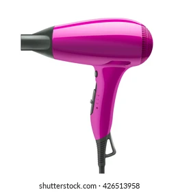

In [59]:
from PIL import Image
img = Image.open(f'test_images/unknown_01.jpg.webp')
img.to_thumb(192,192)


In [60]:
len(recognize_image(img))

22

In [61]:
recognize_image(img)

{'Air Conditioner appliances': 3.789353553163011e-11,
 'Air Fryer appliances': 2.6762986271577915e-10,
 'Blender appliances': 1.2193573262209156e-08,
 'Clothes Dryer appliances': 8.451239708051617e-12,
 'Coffee Maker appliances': 5.264509661540018e-11,
 'Dish Washer appliances': 3.880323579813494e-12,
 'Electric Guitar appliances': 1.1970174851327897e-10,
 'Electric toothbrush appliances': 1.2677254801474191e-08,
 'Fan appliances': 2.837603485517093e-10,
 'Griller appliances': 5.64121145629759e-11,
 'Hair dryer appliances': 1.0,
 'Heater appliances': 3.0702532183291e-10,
 'Induction cooktop appliances ': 9.259662481220232e-12,
 'Iron appliances': 3.7239260564092547e-09,
 'Kettle appliances': 2.4638766027429426e-10,
 'Microwave appliances': 2.3231638834886326e-11,
 'Mixer appliances': 5.283133930333861e-09,
 'Refrigerator appliances': 8.410640239819855e-11,
 'Rice Cooker appliances': 6.860782081341554e-11,
 'Speaker appliances': 4.12378753367193e-09,
 'Toaster appliances': 6.42743080980

In [65]:
#!export

image = gr.Image()
label = gr.Label()
examples=[
    'test_images/unknown_00.jpg',
    'test_images/unknown_01.jpg.webp',
    'test_images/unknown_02.webp',
    'test_images/unknown_03.jpeg',
    'test_images/unknown_04.jpg'
]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label,examples=examples)
iface.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ac69e31870d5249e02.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [66]:
from nbdev.export import notebook2script
notebook2script('app.ipynb')

ImportError: ignored